### Scikit-learn 

Import the necessary libraries and modules

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from lab_utils_multi import load_house_data

Load dataset and scale it

In [23]:
X_train , y_train = load_house_data()
X_features = ['size (sqft)', 'num_bedrooms', 'floors', 'age (years)']
scaled = StandardScaler()
X_train_scaled = scaled.fit_transform(X_train)
print(f"Peak to peak before scaling: {np.ptp(X_train, axis = 0)}")
print(f"Peak to peak after scaling: {np.round(np.ptp(X_train_scaled, axis = 0,), 2)}")

Peak to peak before scaling: [2.406e+03 4.000e+00 1.000e+00 9.500e+01]
Peak to peak after scaling: [5.85 6.14 2.06 3.69]


Create regression Model

In [24]:
sgdr = SGDRegressor(max_iter = 1000)
sgdr.fit(X_train_scaled, y_train)
print(sgdr)
print(f"number of iterations: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations: 130, number of weight updates: 12871.0


In [25]:
w = sgdr.coef_
b = sgdr.intercept_
print(f"modle parameters: w = {w}, b = {b}")

modle parameters: w = [110.20190396 -21.08391388 -32.46393383 -38.02165191], b = [363.16257072]


Make predictions

In [28]:
y_pred_sdgr = sgdr.predict(X_train_scaled)
y_pred = np.dot(X_train_scaled, w) + b
print(f"Both predictions are the same: {np.allclose(y_pred_sdgr, y_pred)}")
print(f"Target values: {y_train[:5]}")

Both predictions are the same: True
Target values: [300.  509.8 394.  540.  415. ]


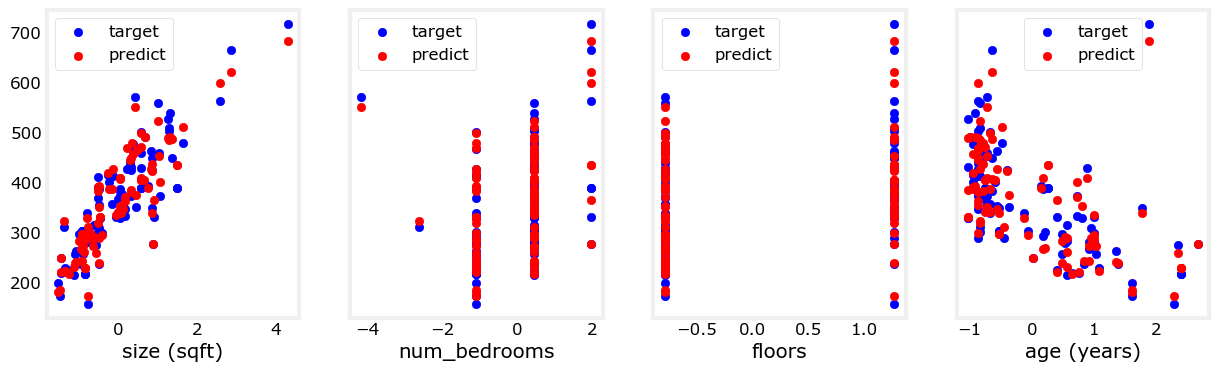

In [30]:
fig, ax = plt.subplots(1, 4, figsize=(15, 4), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train_scaled[:, i], y_train, color='blue', label='target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train_scaled[:,i], y_pred, color='red', label='predict')
    ax[i].legend()